In [1]:
#Experiment was run with a d430 Node.

import pandas as pd

df = pd.read_csv("./cstate_flink_results.csv")
dfaddtl = pd.read_csv("./cstate_flink_addtlinfo.csv")
df = pd.merge(dfaddtl, df, on=["STATE", "POLICY", "RATE"], how="outer")

# Filtering out rows that didn't meet the specified range.
#df = df[abs(df["numRecordsOutPerSecond_avg"] - df["RATE"]) <= (0.05*df["RATE"])]

# Drop residency data - retrieved the info from the wrong machine!
df = df.drop(columns=["POLL_RES", "C1_RES", "C1E_RES", "C3_RES", "C6_RES"])

dfEnabled = df[df["STATE"] == 0]
dfDisabled = df[df["STATE"] == 1]

display(dfEnabled)

/tmp/ipykernel_710412/3638210878.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,STATE,RATE,POLICY,numRecordsOutPerSecond_avg,PKG_ENERGY,RAM_ENERGY
0,0,100,conservative,95.130389,7573.31,1454.17
1,0,200,conservative,200.068627,7594.72,1450.11
2,0,300,conservative,300.000000,7581.44,1432.92
3,0,400,conservative,400.000000,7667.45,1457.10
4,0,500,conservative,500.000000,7700.81,1476.21
...,...,...,...,...,...,...
95,0,1600,schedutil,1289.919444,7699.11,1472.02
96,0,1700,schedutil,1388.168519,7558.54,1481.18
97,0,1800,schedutil,1297.946296,7365.34,1457.09
98,0,1900,schedutil,1252.529630,7209.50,1449.37


In [2]:
display(dfDisabled)

,STATE,RATE,POLICY,numRecordsOutPerSecond_avg,PKG_ENERGY,RAM_ENERGY
100,1,100,conservative,95.035572,7512.52,1462.94
101,1,200,conservative,200.000000,7500.70,1445.14
102,1,300,conservative,300.000000,7496.83,1440.31
103,1,400,conservative,399.929630,7484.52,1457.26
104,1,500,conservative,499.250000,7515.91,1446.31
...,...,...,...,...,...,...
195,1,1600,schedutil,1418.144444,7528.33,1473.75
196,1,1700,schedutil,1379.600926,7483.10,1462.01
197,1,1800,schedutil,1294.322222,7523.54,1454.13
198,1,1900,schedutil,1300.837037,7360.38,1454.95


<Figure size 432x288 with 0 Axes>

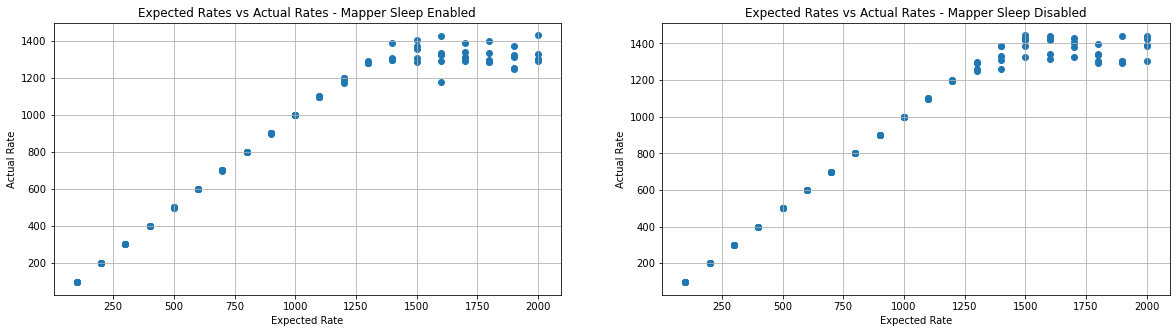

In [3]:
import matplotlib.pyplot as plt
plt.figure()

fig, plots = plt.subplots(1, 2, figsize=(20, 5))

plots[0].scatter(dfEnabled['RATE'], dfEnabled['numRecordsOutPerSecond_avg'])
plots[0].set_xlabel("Expected Rate")
plots[0].set_ylabel("Actual Rate")
plots[0].set_title("Expected Rates vs Actual Rates - Mapper Sleep Enabled")
plots[0].grid(True)

plots[1].scatter(dfDisabled['RATE'], dfDisabled['numRecordsOutPerSecond_avg'])
plots[1].set_xlabel("Expected Rate")
plots[1].set_ylabel("Actual Rate")
plots[1].set_title("Expected Rates vs Actual Rates - Mapper Sleep Disabled")
plots[1].grid(True)

plt.show()

<Figure size 432x288 with 0 Axes>

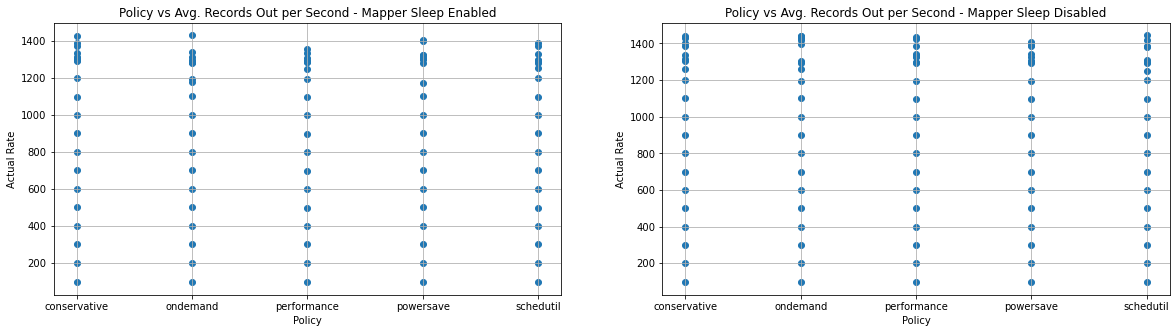

In [4]:
plt.figure()

fig, plots = plt.subplots(1, 2, figsize=(20, 5))

plots[0].scatter(dfEnabled['POLICY'], dfEnabled['numRecordsOutPerSecond_avg'])
plots[0].set_xlabel("Policy")
plots[0].set_ylabel("Actual Rate")
plots[0].set_title("Policy vs Avg. Records Out per Second - Mapper Sleep Enabled")
plots[0].grid(True)

plots[1].scatter(dfDisabled['POLICY'], dfDisabled['numRecordsOutPerSecond_avg'])
plots[1].set_xlabel("Policy")
plots[1].set_ylabel("Actual Rate")
plots[1].set_title("Policy vs Avg. Records Out per Second - Mapper Sleep Disabled")
plots[1].grid(True)

plt.show()

<Figure size 432x288 with 0 Axes>

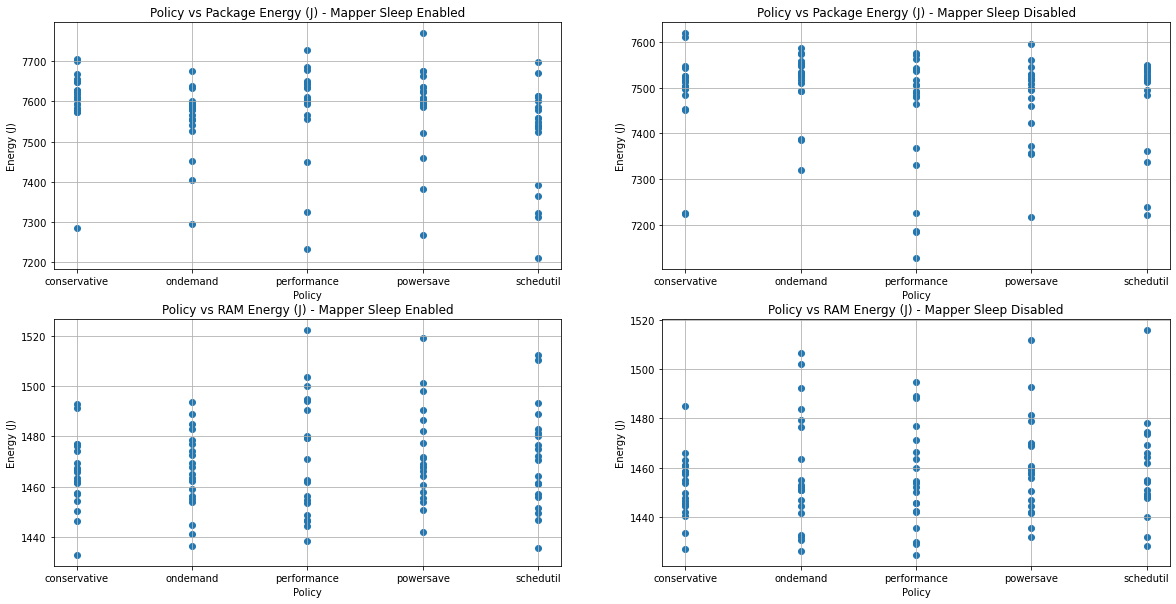

In [5]:
plt.figure()

fig, plots = plt.subplots(2, 2, figsize=(20, 10))

plots[0][0].scatter(dfEnabled['POLICY'], dfEnabled['PKG_ENERGY'])
plots[0][0].set_xlabel("Policy")
plots[0][0].set_ylabel("Energy (J)")
plots[0][0].set_title("Policy vs Package Energy (J) - Mapper Sleep Enabled")
plots[0][0].grid(True)

plots[0][1].scatter(dfDisabled['POLICY'], dfDisabled['PKG_ENERGY'])
plots[0][1].set_xlabel("Policy")
plots[0][1].set_ylabel("Energy (J)")
plots[0][1].set_title("Policy vs Package Energy (J) - Mapper Sleep Disabled")
plots[0][1].grid(True)

plots[1][0].scatter(dfEnabled['POLICY'], dfEnabled['RAM_ENERGY'])
plots[1][0].set_xlabel("Policy")
plots[1][0].set_ylabel("Energy (J)")
plots[1][0].set_title("Policy vs RAM Energy (J) - Mapper Sleep Enabled")
plots[1][0].grid(True)

plots[1][1].scatter(dfDisabled['POLICY'], dfDisabled['RAM_ENERGY'])
plots[1][1].set_xlabel("Policy")
plots[1][1].set_ylabel("Energy (J)")
plots[1][1].set_title("Policy vs RAM Energy (J) - Mapper Sleep Disabled")
plots[1][1].grid(True)

plt.show()